1. KÜTÜPHANELER

In [1]:
#kütüphaneleri import edelim
#veri işleme kümeleri
import pandas as pd
import numpy as np

#veri görselleştirme kümeleri
import matplotlib.pyplot as plt
import seaborn as sns

#makine öğrenmesi için kullanılan kütüphaneler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#değerlendirme metrikleri
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

#yapay sinir ağları oluşturmak için kullanılan kütüphaneler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

#hatalar için kullanılan kütüphanedir.
import warnings
warnings.filterwarnings("ignore")

2. VERİ SETİ SEÇİMİ

In [2]:
#veri seti seçimi ve yüklenmesi: keras kütüphanesinden "fashion_minst" dataseti
fashion_mnist=tf.keras.datasets.fashion_mnist
#veri setini yükleme:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

3. VERİ ÖN İŞLEME

In [3]:
#verileri bölme : train(eğitim) ve test olarak //train_test_split kullanılacak
#train: modelin eğitildiği veri setidir.genellikle %70-80 lik kısmı kapsar
#test: trainden bağımsız oluşan veri setidir. geri ye kalan alanın %20-30 kısmını kapsar
#keras kütüphanesinden bunlar tanımlıdır.
X_train, X_test, y_train, y_test=train_test_split(X_train ,y_train, test_size=0.2, random_state=50)
#bölünmüş verilerin boyutlarını yazdırma: ".shape" metodu kullanılır
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (48000, 28, 28)
X_test: (12000, 28, 28)
y_train: (48000,)
y_test: (12000,)


4. VERİ SETİ GÖRÜNTÜLERİ

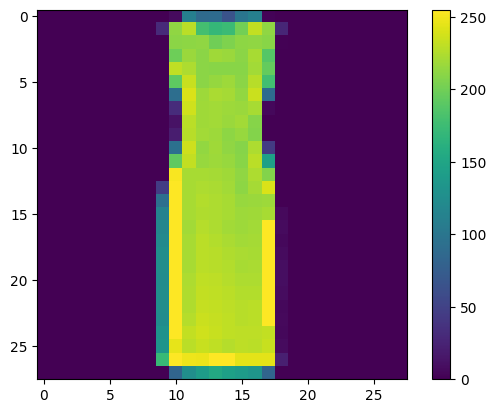

In [7]:
#veri seti görüntülerini yazdırma:
#1)
plt.figure()
plt.imshow(X_train[8])
plt.colorbar()
plt.grid(False)
plt.show()

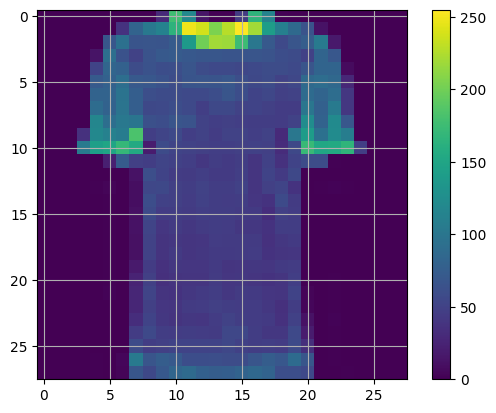

In [8]:
#2)
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.grid(True)
plt.show()

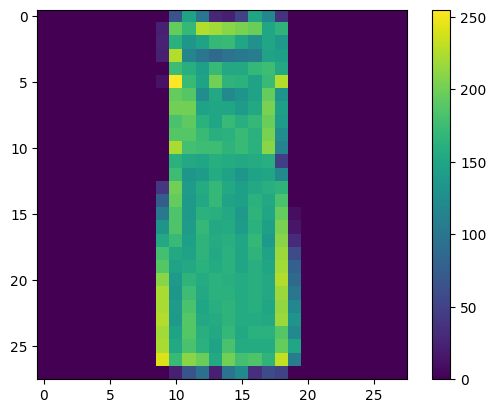

In [9]:
#3)
plt.figure()
plt.imshow(X_train[66])
plt.colorbar()
plt.grid(False)
plt.show()

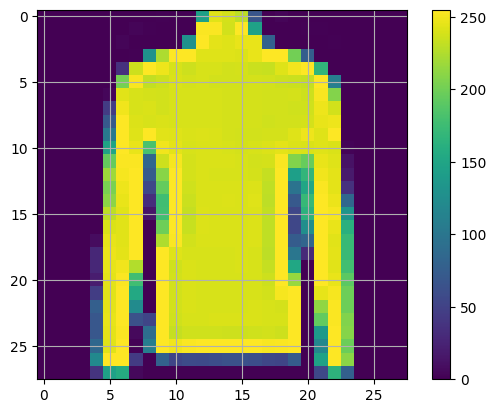

In [10]:
#4)
plt.figure()
plt.imshow(X_train[15])
plt.colorbar()
plt.grid(True)
plt.show()

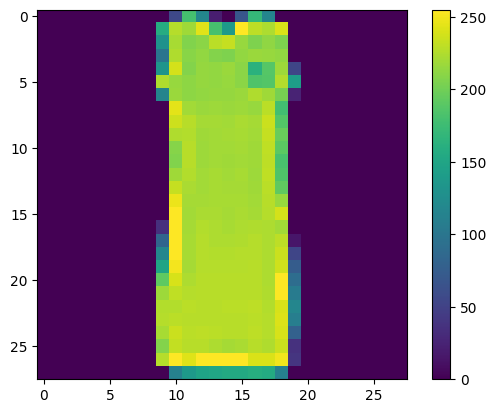

In [11]:
#5)
plt.figure()
plt.imshow(X_train[22])
plt.colorbar()
plt.grid(False)
plt.show()

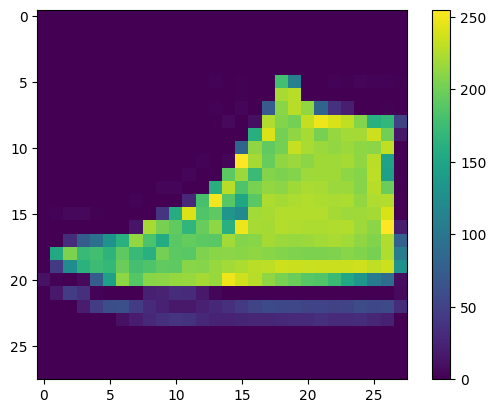

In [12]:
#6)
plt.figure()
plt.imshow(X_train[13])
plt.colorbar()
plt.grid(False)
plt.show()

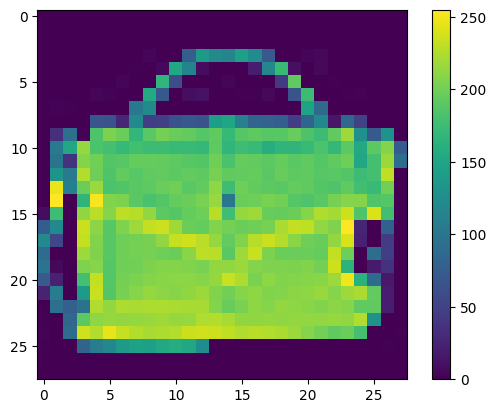

In [13]:
#7)
plt.figure()
plt.imshow(X_train[54])
plt.colorbar()
plt.grid(False)
plt.show()

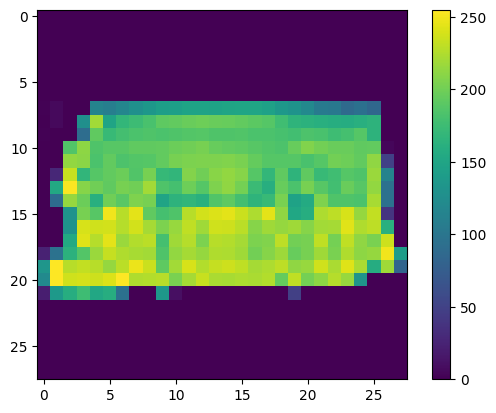

In [14]:
#8)
plt.figure()
plt.imshow(X_train[71])
plt.colorbar()
plt.grid(False)
plt.show()

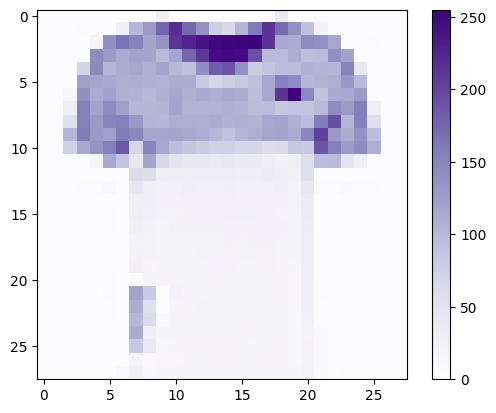

In [15]:
#9)
plt.figure()
plt.imshow(X_train[371],cmap='Purples')
plt.colorbar()
plt.grid(False)
plt.show()

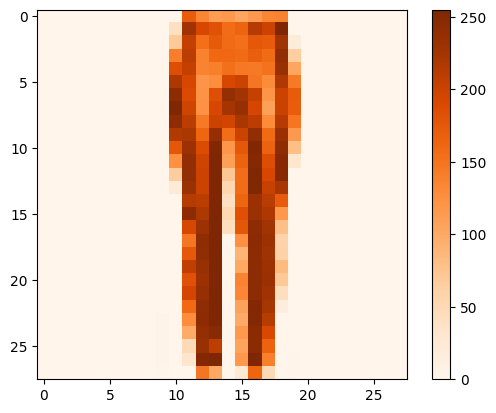

In [16]:
#10)
plt.figure()
plt.imshow(X_train[7892], cmap='Oranges')
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
#Verileri normalize etme: verileri 255 e bölerek normalleştirme işlemi yapabiliriz.
X_train = X_train / 255.0
X_test = X_test / 255.0

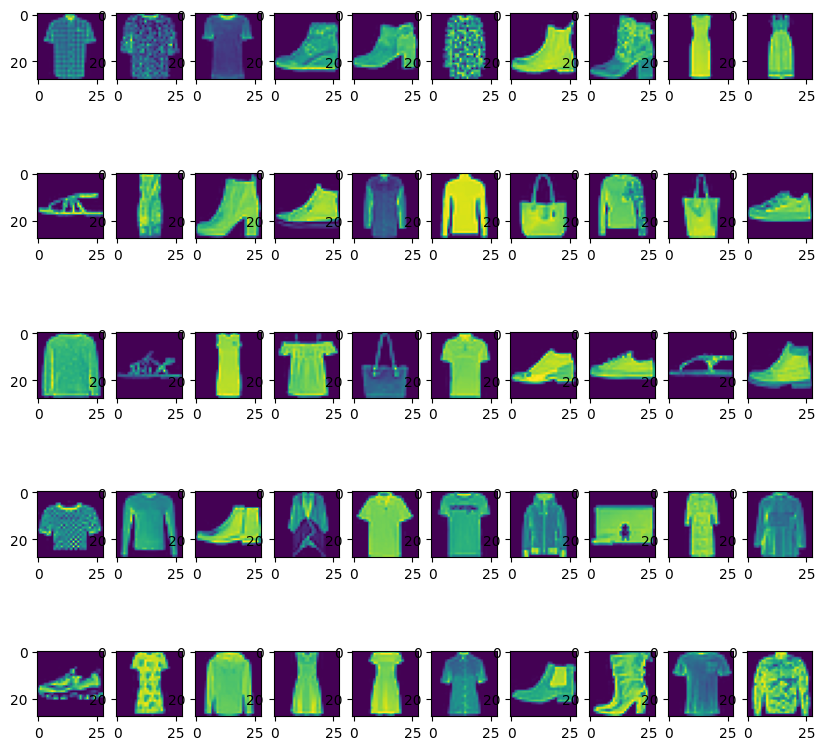

In [18]:
#50 görüntüyü görselleştirelim. Bunun için for döngüsünü kullanabiliriz.
plt.figure(figsize=(10, 10))
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.imshow(X_train[i],)
    plt.axis('on')
plt.show()

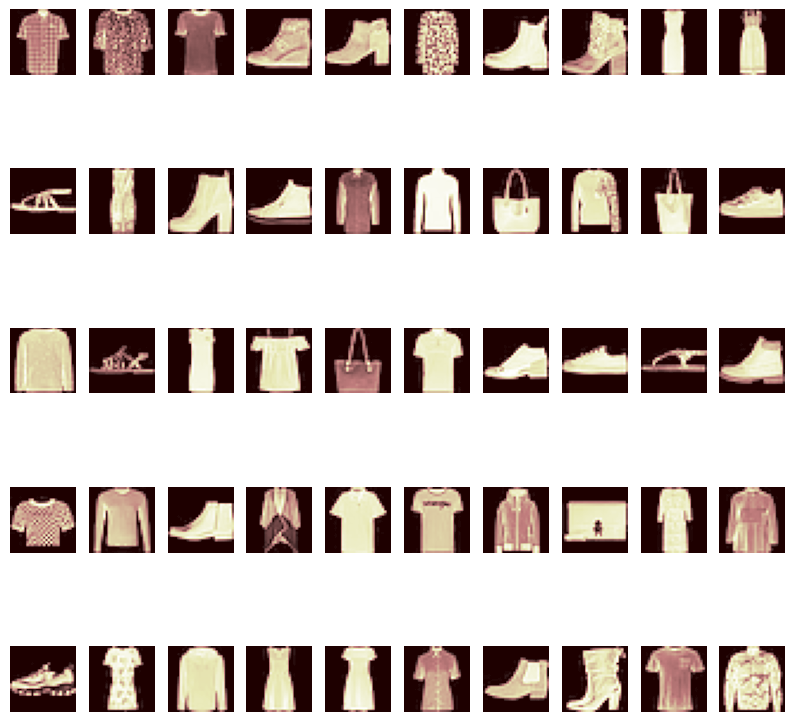

In [19]:
plt.figure(figsize=(10, 10))
for i in range(50):
    plt.subplot(5,10, i+1)
    plt.imshow(X_train[i],cmap='pink')
    plt.axis('off')
plt.show()

5. KNN MODELİ

In [13]:
#makine öğrenmesi algoritması: *KNN ALGORİTMASI*
#önce veri setimizi düzleştirelim. reshape() metodu ile.
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)
#modeli oluşturup fit() metodu ile eğitelim.
knn=KNeighborsClassifier().fit(X_train,y_train)
#test verisine tahmin yaptırma:
y_pred_knn=knn.predict(X_test)
#doğruluk değeri hesaplama
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Doğruluğu: {accuracy_knn:.4f}")

KNN Model Doğruluğu: 0.8528


In [14]:
#değerlendirme metrikleri kullanma:
#Accuracy, Recall, F1- score, percision
acc=accuracy_score(y_test,y_pred_knn)
rcl=recall_score(y_test,y_pred_knn, average='weighted')
f1=f1_score(y_test,y_pred_knn,average='weighted')
pre=precision_score(y_test,y_pred_knn,average='weighted')
print(acc,rcl,f1,pre)

0.8528333333333333 0.8528333333333333 0.8521254303970746 0.855957466317471


In [15]:
#tüm bunları classification_report() fonksiyonu ile değerlendirebiliriz.
#önce kütüphanemizi import edelim:
from sklearn.metrics import classification_report
#şimdi değerlendirelim:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1151
           1       0.99      0.97      0.98      1208
           2       0.71      0.81      0.76      1168
           3       0.91      0.87      0.89      1217
           4       0.78      0.75      0.77      1172
           5       1.00      0.82      0.90      1242
           6       0.66      0.57      0.61      1182
           7       0.87      0.94      0.90      1232
           8       0.97      0.95      0.96      1219
           9       0.88      0.96      0.92      1209

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.86      0.85      0.85     12000



6. SVM MODELİ

In [6]:
##makine öğrenmesi algoritması: *SVM ALGORİTMASI*
from sklearn.svm import SVC
from sklearn import svm

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
#veri setini küçült:
X_train_small, _, y_train_small, _=train_test_split(X_train,y_train, test_size=0.9 ,random_state=42)

#modeli oluştur:
svm = SVC(kernel='rbf', gamma='scale')


In [7]:
#modeli eğit:
svm.fit(X_train_small,y_train_small)

SVC()

In [8]:
#test verisine tahmin yaptırma:
y_pred_svm=svm.predict(X_train_small)

In [10]:
#doğruluk değeri hesaplama
accuracy_svm = accuracy_score(y_test[:len(y_pred_svm)], y_pred_svm)
print(f"SVM Model Doğruluğu: {accuracy_svm:.4f}")

SVM Model Doğruluğu: 0.1010


In [17]:
#şimdi değerlendirelim:
print(classification_report(y_test[:len(y_pred_svm)],y_pred_svm))

              precision    recall  f1-score   support

           0       0.09      0.10      0.09       464
           1       0.11      0.11      0.11       478
           2       0.09      0.11      0.10       427
           3       0.10      0.11      0.10       463
           4       0.07      0.08      0.08       461
           5       0.13      0.11      0.12       500
           6       0.13      0.10      0.11       505
           7       0.10      0.09      0.10       528
           8       0.11      0.11      0.11       485
           9       0.10      0.10      0.10       489

    accuracy                           0.10      4800
   macro avg       0.10      0.10      0.10      4800
weighted avg       0.10      0.10      0.10      4800

